In [2]:
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset, random_split
# Summary-like from Tensorflow
# from torchinfo import summary
# Import Numpy
import numpy as np
# Plot Import
import matplotlib.pyplot as plt
# For timer
import time
# Import OS
import os
from statistics import mean
# WFDB
import wfdb
# ==== LOCAL LIBS ====
import ecg_tools_lite as et
import evaluator as eva
import trainer as tr
import models as mod
# math
import math

In [1]:
# What are you trying to do?
create_new_model = True
create_new_res = True
# If create_new_model is True, epochs must have a value
epochs = 5
# If create_new_model is False, load_model_name must have a value
load_model_name = 'model_2021-2-19_2250.pt'
ecg_saved_res = 'res_pt_full_2021-2-20_111.npy'
# Normalization option (either option 0 or 1)
norm_option = 2

In [3]:
# =============== LOAD ECG DATA ===============
ecg_noisy = np.load('all_none_fs1024_e06.npy').flatten()
ecg_clean = np.load('all_none_fs1024_e24.npy')

# Acquire original shape
x = ecg_clean.shape[0]
y = ecg_clean.shape[2]
z = ecg_clean.shape[1]
# Continue flattening
ecg_clean = ecg_clean.flatten()

# Normalize ecg_clean per subset
# ecg_noisy = et.norm_global_opt_2(ecg_noisy)
# ecg_clean = et.norm_global_opt_2(ecg_clean)

# RESHAPE BACK INTO APPROPRIATE SHAPE
ecg_noisy = torch.reshape(torch.from_numpy(ecg_noisy), (x, y, z)).cuda().double()
ecg_clean = torch.reshape(torch.from_numpy(ecg_clean), (x, y, z)).cuda().double()

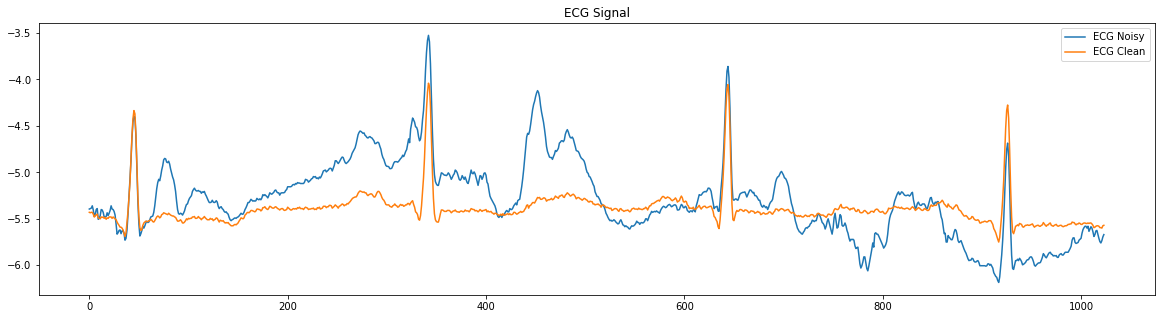

In [4]:
et.ecg_plot( [ecg_noisy.cpu().flatten(), ecg_clean.cpu().flatten()], ['ECG Noisy', 'ECG Clean'], index = 0)

In [5]:
# Train a new model
if create_new_model:
    # move model to be run by gpu
    model = mod.ae_sampler().cuda()
    model.double()
    # start training the model
    losses = tr.train_model( model=model,
                    epochs=epochs, 
                    ecg_noisy=ecg_noisy, 
                    ecg_clean=ecg_clean,
                    train_pct=0.8)
    save_file_name = 'model_' + str(et.get_local_time()) + '.pt';
    # saved model will have model_YYYY-MM-DD_hhmm.pt format
    torch.save(model.state_dict(), save_file_name)
    print(f'Saved {et.get_local_time()}')
# load model instead if existing
else:
    model = mod.ae_sampler().cuda()
    model.double()
    model.load_state_dict(torch.load(load_model_name))
    model.to('cuda')
    model.eval()
    print( f'Model {load_model_name} has been loaded')

train_size[4435] + valid_size[1109]= 5544
same size
Epoch 1 of 10 || time: 71.22 || loss = 13.233874095707439
Epoch 2 of 10 || time: 67.11 || loss = 0.80932436252803
Epoch 3 of 10 || time: 66.93 || loss = 0.17850221757385262
Epoch 4 of 10 || time: 66.97 || loss = 0.17452829190899127
Epoch 5 of 10 || time: 69.60 || loss = 0.1718590886218817
Epoch 6 of 10 || time: 66.73 || loss = 0.17007921524104297
Epoch 7 of 10 || time: 66.52 || loss = 0.1686321593988831
Epoch 8 of 10 || time: 66.87 || loss = 0.16766637335329673
Epoch 9 of 10 || time: 67.33 || loss = 0.16676527787136478
Epoch 10 of 10 || time: 66.84 || loss = 0.16542548946248709
Elapsed time: 676.12, (in mins: 11:16)
Validation dataset has not been used: Available validex set size = 1109
Saved 2021-2-20_300


In [7]:
if create_new_model == True or create_new_res == True:
    ecg_res = et.concat_pt_full(model, ecg_noisy)
    et.get_local_time()
else:
    ecg_res = np.load( ecg_saved_res )

ecg_res = ecg_res.flatten()

Result size: (4000, 1, 1024)
Result size: (1544, 1, 1024)
Complete shape is: (5544, 1, 1024)
Filename: res_pt_full_2021-2-20_300


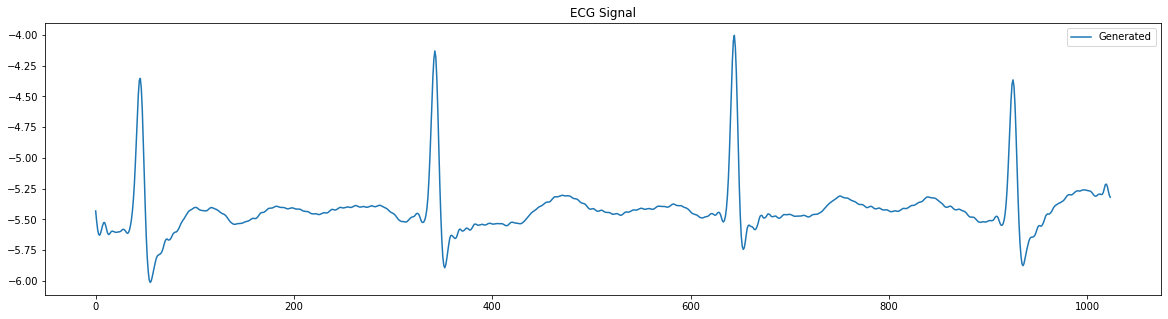

In [8]:
et.ecg_plot( [ecg_res], ['Generated'])

In [ ]:
# ecg_res = ecg_res.flatten()
# ecg_res = et.realign_starting(ecg_res, ecg_clean_flat)

In [ ]:
# ecg_res1 = np.load('res_pt_full_2021-2-19_1813.npy').flatten()
# ecg_res2 = np.load('res_pt_full_2021-2-19_1815.npy').flatten()
# ecg_res3 = np.load('res_pt_full_2021-2-19_1953.npy').flatten()
# ecg_res4 = np.load('res_pt_full_2021-2-19_2044.npy').flatten()

In [ ]:
# ecg_res1 = et.realign_starting(ecg_res1, ecg_clean_flat)
# ecg_res2 = et.realign_starting(ecg_res2, ecg_clean_flat)
# ecg_res3 = et.realign_starting(ecg_res3, ecg_clean_flat)
# ecg_res4 = et.realign_starting(ecg_res4, ecg_clean_flat)

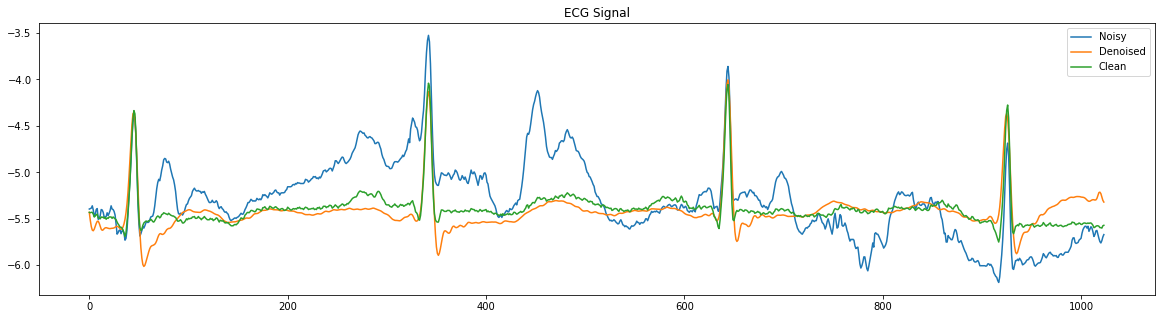

In [13]:
et.ecg_plot( [ecg_noisy.cpu().flatten(), ecg_res, ecg_clean.cpu().flatten()], ['Noisy', 'Denoised', 'Clean'])